In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import re
import numpy as np
import pandas as pd

from glob import glob

from dogFunctions import *
from imageTrans import plotGrid

from model import *

Using TensorFlow backend.


In [2]:
testFiles  = np.array( glob('./test/*.jpg') )
trainFiles = np.array( glob('./train/*.jpg') )

breeds = readBreeds()
labels = pd.read_csv("labels.csv")

labels['breed'] = pd.Categorical( labels['breed'], categories = breeds )
labels['breed'] = labels['breed'].cat.codes

In [3]:
#make sure there are an equal proportion of each breed in validation set.

valFiles = sampleDogs( trainFiles, labels, 0.16 )
valFiles = np.array( list(set(valFiles)) )


tmp = []

for f in trainFiles:
    if ( not (f in valFiles) ):
        tmp.append(f)

trainFiles = np.array( tmp )
np.random.shuffle(trainFiles)

print( "Validation set:", len(valFiles) )
print( "Training set:", len(trainFiles) )

Validation set: 1480
Training set: 8742


In [4]:
params = { "batchSize" : 1024, "params" : { "alpha" : 0.001,
                                           #"b1"     : 0.99,
                                           #"b2"     : 0.99,
                                           "eps"    : 0.1 } }
                                           #"bnm"    : 0.99 } }

loVal, tls, vls, tas, vas = trainModel( trainFiles, valFiles, labels, params, saveModel = True )

Step 25:
   valLoss: 4.841463, trainLoss: 4.828303, trAcc: 0.0086, valAcc: 0.0115, patience:  0
Step 50:
   valLoss: 4.796624, trainLoss: 4.760319, trAcc: 0.0114, valAcc: 0.0128, patience:  0
Step 75:
   valLoss: 4.765713, trainLoss: 4.746945, trAcc: 0.0164, valAcc: 0.0189, patience:  0
Step 100:
   valLoss: 4.740425, trainLoss: 4.698063, trAcc: 0.0202, valAcc: 0.0243, patience:  0
Step 125:
   valLoss: 4.718555, trainLoss: 4.640281, trAcc: 0.0251, valAcc: 0.0216, patience:  0
Step 150:
   valLoss: 4.696748, trainLoss: 4.601586, trAcc: 0.0293, valAcc: 0.0216, patience:  0
Step 175:
   valLoss: 4.675150, trainLoss: 4.549146, trAcc: 0.0325, valAcc: 0.0230, patience:  0
Step 200:
   valLoss: 4.647646, trainLoss: 4.516428, trAcc: 0.0408, valAcc: 0.0264, patience:  0
Step 225:
   valLoss: 4.617534, trainLoss: 4.446870, trAcc: 0.0500, valAcc: 0.0277, patience:  0
Step 250:
   valLoss: 4.581098, trainLoss: 4.346212, trAcc: 0.0599, valAcc: 0.0358, patience:  0
Step 275:
   valLoss: 4.543824, t

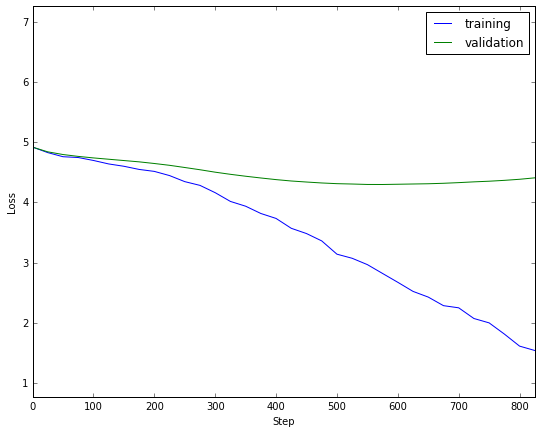

In [5]:
fig = plt.figure( 1, (9, 7) )

n = len(tls)

plt.plot( list( range(0, n * 25, 25) ), tls, label = "training" )
plt.plot( list( range(0, n * 25, 25) ), vls, label = "validation" )

plt.xlim( xmin = 0, xmax = (len(tls) - 1)*25 )
plt.ylim( ymax = np.max(vls[1:]) + .5 * max(tls[1], vls[1]),
          ymin = min( np.min(tls[1:]), np.min(vls[1:]) )
               - .5 * min( np.min(tls), np.min(vls) ) )

plt.xlabel("Step")
plt.ylabel("Loss")

plt.legend( loc = "best" )

plt.show()

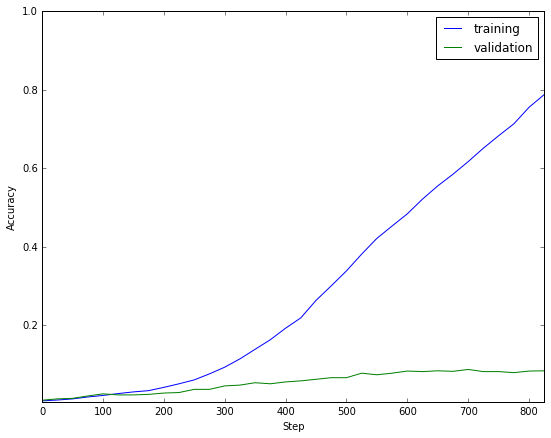

In [6]:
fig = plt.figure( 2, (9, 7) )

n = len(vas)

plt.plot( list( range(0, n * 25, 25) ), tas, label = "training" )
plt.plot( list( range(0, n * 25, 25) ), vas, label = "validation" )

plt.xlim( xmin = 0, xmax = (len(vas) - 1)*25 )
plt.ylim( ymax = 1, #min(np.max(vas) + .5 * np.max(vas), 1),
          ymin = max( np.min(vas) - .5 * np.min(vas), 0) )

plt.xlabel("Step")
plt.ylabel("Accuracy")

plt.legend( loc = "best" )

plt.show()